In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import svm
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     Ship_name Cruise_line  Age  ...  cabins  passenger_density   crew
0      Journey     Azamara    6  ...    3.55              42.64   3.55
1        Quest     Azamara    6  ...    3.55              42.64   3.55
2  Celebration    Carnival   26  ...    7.43              31.80   6.70
3     Conquest    Carnival   11  ...   14.88              36.99  19.10
4      Destiny    Carnival   17  ...   13.21              38.36  10.00

[5 rows x 9 columns]

              Age     Tonnage  ...  passenger_density        crew
count  158.000000  158.000000  ...         158.000000  158.000000
mean    15.689873   71.284671  ...          39.900949    7.794177
std      7.615691   37.229540  ...           8.639217    3.503487
min      4.000000    2.329000  ...          17.700000    0.590000
25%     10.000000   46.013000  ...          34.570000    5.480000
50%     14.000000   71.899000  ...          39.085000    8.150000
75%     20.000000   90.772500  ...          44.185000    9.990000
max     48.000000  220.

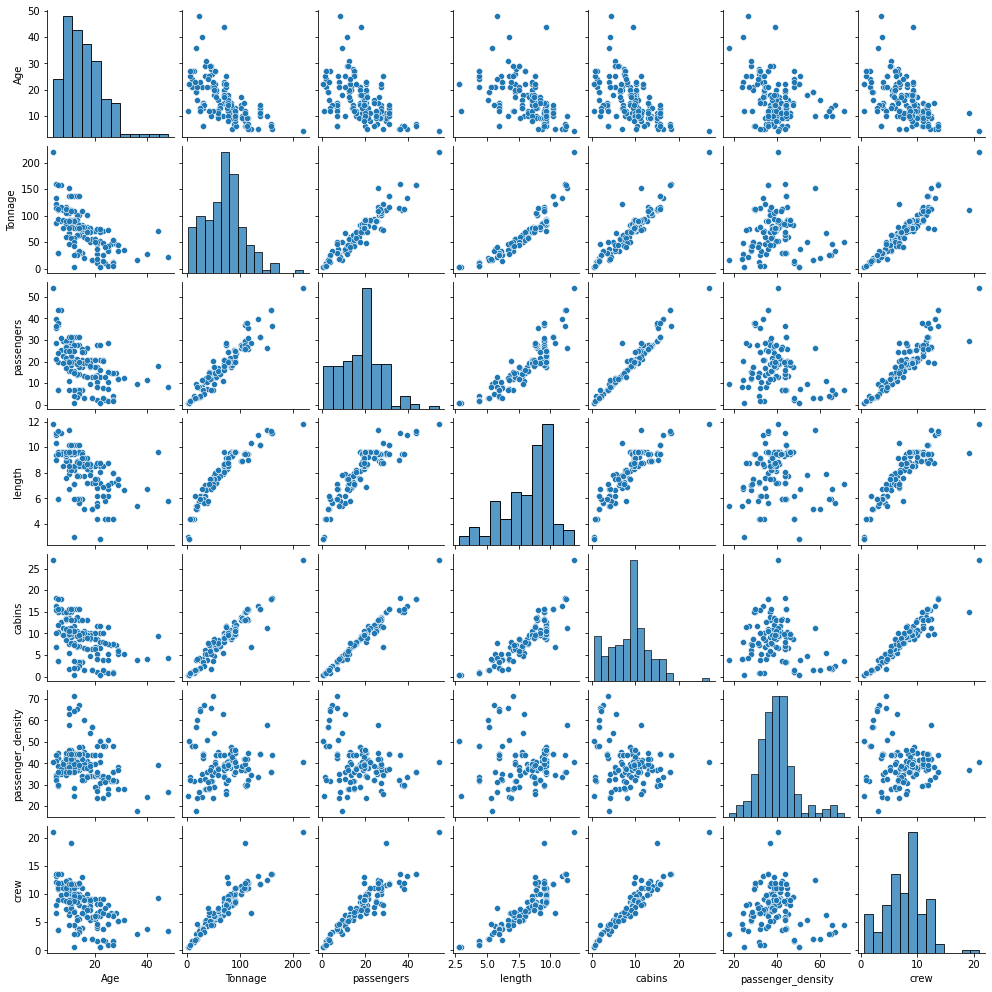

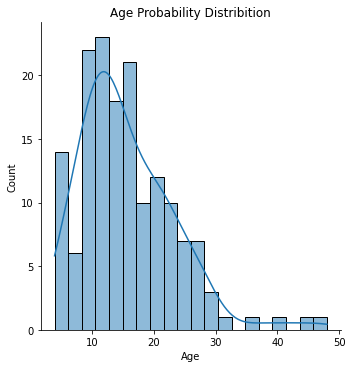

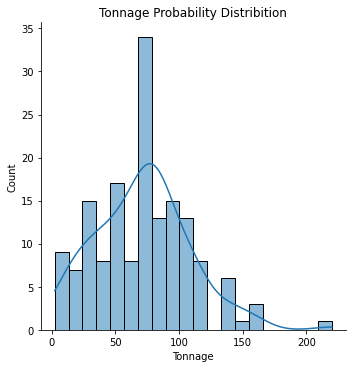

In [ ]:
"""
Cruise Ship Coding Exercise:

Objective: Build a regressor that recommends the “crew” size for potential ship buyers.
Please do the following steps (hint: use numpy, scipy, pandas, sklearn and matplotlib)

1.    Read the file and display columns. 
2.    Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.
3.    Select columns that will probably be important to predict “crew” size.
4.    If you removed columns, explain why you removed those.
5.    Use one-hot encoding for categorical features. => ONLY FOR CATEGORICAL VARIABLES NOT FOR THE WHOLE THING
6.    Create training and testing sets (use 60% of the data for the training and reminder for testing).
7.    Build a machine learning model to predict the ‘crew’ size.
8.    Calculate the Pearson correlation coefficient for the training set and testing datasets.
9.    Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
10.   What is regularization? What is the regularization parameter in your model?
"""

df = pd.read_csv("cruise_ship_info.csv")
print(df.head()) # df.head() returns the first n rows for the dataframe object based on position (n=5 is the default). Displays the columns contained within the dataframe.
print("")
"""
CSV file contains 9 columns:
1. Ship_name | 2. Cruise_line | 3. Age | 4. Tonnage | 5. Passengers | 6. Length | 7. Cabins | 8. Passenger_density | 9. Crew
"""
print(df.describe()) # df.describe() is a method which is applied to a dataframe to display all of the basic statistics for the quantifiable elements within a dataframe.

"""
To note:
    - Out of 9 columns, 7 are quantifiable (they contain numbers which can be used to calculate statistics): All except Ship_name and Cruise_line
"""
"""     DATA ANALYSIS     """
columns = ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
sns.pairplot(df[columns], height=2.0) # Plotting pairwise relationships within the dataset given by the DataFrame object to find some of the visually correlated plots
# Plotting a probability distribution of Ages and Tonnage per count (per data entry/person)
sns.displot(df['Age'], bins=20, kde=True) # create an age plot and use 20 bins to distribute the data more precisely
plt.title('Age Probability Distribition')
sns.displot(df['Tonnage'], bins=20, kde=True) # create an age plot and use 20 bins to distribute the data more precisely
plt.title('Tonnage Probability Distribition')
plt.show() # display the above plots

##**Feature Selection**

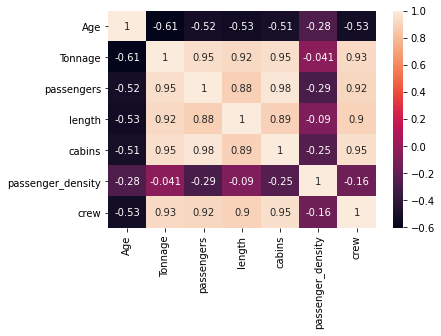

'\n  From the covariance matrix, the features: Passengers, Tonnage, length and cabins seem to be closely correlated with the feature crew\n  *Denoted by a covariance close to 1*. Thus, these closely correlated features should be selected as the ideal predictors \n  to work with as part of the regression model.\n'

In [ ]:
"""    Feature Selection   """
covariance_matrix = df.corr()
sns.heatmap(covariance_matrix, annot = True)
plt.show()
"""
  From the covariance matrix, the features: Passengers, Tonnage, length and cabins seem to be closely correlated with the feature crew
  *Denoted by a covariance close to 1*. Thus, these closely correlated features should be selected as the ideal predictors 
  to work with as part of the regression model.
"""

In [ ]:
selected_features = ['Tonnage', 'passengers', 'length', 'cabins', 'crew']
"""
  What we are trying to achieve is a recommended crew size. Therefore our predictors(X) will be Tonnage, Passengers, Length and cabins
  whilst crew will be our output variable (The variable the regression model will be trying to predict).
"""
x = df[selected_features].iloc[:,0:4].values
y = df[selected_features]['crew'].values
print(x.shape)
print(y.shape)

(158, 4)
(158,)


##**Model Creation**

In [ ]:
linear_model_pipeline = Pipeline([('scaler', StandardScaler()),('linear_regressor', LinearRegression())])
kneighbours_model_pipeline = Pipeline([('scaler', StandardScaler()),('kneighbours_regressor', KNeighborsRegressor(n_neighbors = 3))])
svm_model_pipeline = Pipeline([('scaler', StandardScaler()),('svm_regressor', svm.SVR(kernel='linear',C=1.0))])

##**Train and Test Dataset Creation** 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=0)

##**Training the model with the training data**

In [ ]:
linear_model_pipeline.fit(X_train, Y_train)
kneighbours_model_pipeline.fit(X_train, Y_train)
svm_model_pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_regressor',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

##**Testing the predictive power of the model**

In [ ]:
y_pred_lr = linear_model_pipeline.predict(X_test)
y_pred_kn = linear_model_pipeline.predict(X_test)
y_pred_svm = linear_model_pipeline.predict(X_test)

##**Model prediction results**

In [ ]:
# Regression Score
lr_reg_score = r2_score(Y_test, y_pred_lr)
kn_reg_score = r2_score(Y_test, y_pred_kn)
svm_reg_score = r2_score(Y_test, y_pred_svm)
# MSE
lr_MSE = mean_squared_error(Y_test, y_pred_lr)
kn_MSE = mean_squared_error(Y_test, y_pred_kn)
svm_MSE = mean_squared_error(Y_test, y_pred_svm)

In [ ]:
print(lr_reg_score, kn_reg_score, svm_reg_score)
print(lr_MSE, kn_MSE, svm_MSE)

0.9282797824863903 0.9282797824863903 0.9282797824863903
0.8886808710251111 0.8886808710251111 0.8886808710251111
